### Modules used in this notebook
cartopy, xarray, xeofs, numpy

# C.007: Computing NAO EOF using `xeofs`

The North Atlantic Oscillation (NAO) can be calculated using the EOF (Empirical Orthogonal Function) of monthly mean 500mb height anomaly data [NOAA definition](https://www.ncei.noaa.gov/access/monitoring/nao/). This notebook calculated the NAO index using the [xeofs](https://xeofs.readthedocs.io/en/latest/) package. 

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import xeofs as xe
from eofs.examples import example_data_path

Read geopotential height data using the xarray module. The file contains December-February averages of geopotential height at 500 hPa for the European/Atlantic domain (80W-40E, 20-90N).

In [2]:
# Read geopotential height data using the xarray module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
z_djf = xr.open_dataset('../data/hgt_djf.nc')['z']
z_djf

c:\Users\matte\miniconda3\envs\cookbook\Lib\site-packages\xarray\coding\times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.DataArray 'z' (time: 65, pressure: 1, latitude: 29, longitude: 49)> Size: 739kB
[92365 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 520B 1948-01-15T12:00:00 ... 2012-01-15T...
  * pressure   (pressure) float32 4B 500.0
  * latitude   (latitude) float32 116B 20.0 22.5 25.0 27.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 196B -80.0 -77.5 -75.0 ... 35.0 37.5 40.0
Attributes:
    standard_name:  geopotential_height
    long_name:      DJF mean geopotential height

Compute anomalies by removing the time-mean.

In [3]:
z_djf = z_djf - z_djf.mean(dim='time')

Create an EOF solver to do the EOF analysis. Square-root of cosine of latitude weights are applied before the computation of EOFs.

In [4]:
eof = xe.models.EOF(n_modes=10, standardize = False, use_coslat=True)

Retrieve the leading EOF, expressed as the covariance between the leading PC time series and the input SLP anomalies at each grid point.

In [5]:
eof.fit(z_djf, dim="time")

In [6]:
comps = eof.components()  # EOFs (spatial patterns)
comps

<xarray.DataArray 'components' (mode: 10, pressure: 1, latitude: 29,
                                longitude: 49)> Size: 114kB
array([[[[-0.00469613, -0.00392751, -0.00301314, ..., -0.00455412,
          -0.00541736, -0.0061014 ],
         [-0.00783331, -0.00710821, -0.00619347, ..., -0.00185039,
          -0.00301786, -0.00390021],
         [-0.0119648 , -0.01133982, -0.01052566, ...,  0.00243545,
           0.001167  ,  0.00020305],
         ...,
         [ 0.00945986,  0.00956828,  0.00968678, ...,  0.01089302,
           0.01084589,  0.01079533],
         [ 0.00671332,  0.00674136,  0.00676818, ...,  0.0073578 ,
           0.00734776,  0.00734341],
         [-0.        , -0.        , -0.        , ..., -0.        ,
          -0.        , -0.        ]]],


       [[[-0.0114903 , -0.01185306, -0.01204229, ...,  0.00219043,
           0.00207651,  0.00174118],
         [-0.01371036, -0.01438028, -0.01488406, ...,  0.00334003,
           0.00330025,  0.00300748],
         [-0.01562735, -0.0166357 , -0.01749004, ...,  0.00306471,
...
           0.0127612 ,  0.01290298],
         [ 0.01759447,  0.01754058,  0.01744457, ...,  0.01137569,
           0.01134995,  0.01131733],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]]],


       [[[-0.00816634, -0.00764114, -0.00733756, ..., -0.01988707,
          -0.0207315 , -0.02082724],
         [-0.01225791, -0.01157005, -0.01114309, ..., -0.02940686,
          -0.0317683 , -0.03277874],
         [-0.01855436, -0.01806146, -0.01725352, ..., -0.03632821,
          -0.04072207, -0.04305328],
         ...,
         [ 0.00792803,  0.00806506,  0.00824476, ...,  0.03864472,
           0.03932587,  0.0400154 ],
         [ 0.01311772,  0.01316242,  0.01322447, ...,  0.02446398,
           0.02472234,  0.02498566],
         [-0.        , -0.        , -0.        , ..., -0.        ,
          -0.        , -0.        ]]]])
Coordinates:
  * pressure   (pressure) float32 4B 500.0
  * latitude   (latitude) float32 116B 20.0 22.5 25.0 27.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 196B -80.0 -77.5 -75.0 ... 35.0 37.5 40.0
  * mode       (mode) int32 40B 1 2 3 4 5 6 7 8 9 10
Attributes: (12/16)
    model:          EOF analysis
    software:       xeofs
    version:        2.4.0
    date:           2024-09-21 19:29:39
    n_modes:        10
    center:         True
    ...             ...
    feature_name:   feature
    random_state:   None
    verbose:        False
    compute:        True
    solver:         auto
    solver_kwargs:  {}

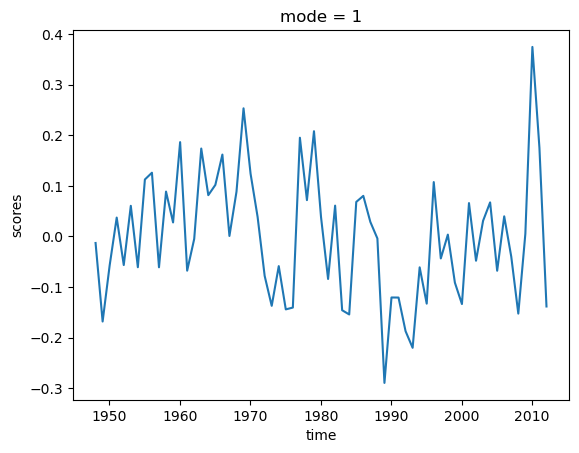

In [7]:

scores = eof.scores()  # PCs (temporal patterns)
scores.isel(mode = 0).plot()

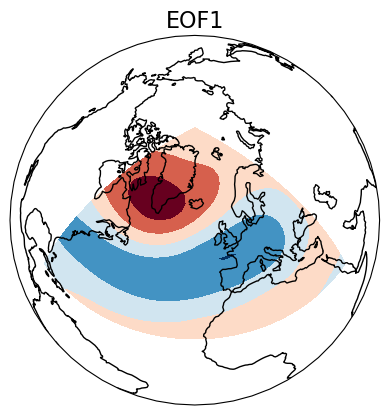

In [8]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
comps.isel(mode = 0).squeeze().plot.contourf(ax=ax,
                                   cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1', fontsize=16)
plt.show()